In [5]:
import json
from collections import OrderedDict
import pandas as pd
import numpy as np
import csv

In [6]:
def readDataSet(csvFileName):
    posts = []
    comments = []
    with open(csvFileName) as csvFile:
        reader = csv.reader(csvFile, delimiter='|')
        for line in reader:
            comment = dict()
            commentId = line[1].split()
            commentClass = line[2].split()
            for i in range(len(commentId)):
                comment[commentId[i]] = commentClass[i]
            comments.append(comment)
            posts.append(line[0])
        return posts,comments

In [7]:
with open("main/comments.json", 'r') as f:
    comments = json.load(f)
# print(comments["i5ips"]["text"])
# print(comments["c213wqi"]["text"])
# print(comments["c214nz3"]["text"])
# print(comments["c21519r"]["text"])
# print(comments["c215dyd"]["text"])

# print(comments["7zp51"]["text"])
# print(comments["c07uja7"]["text"])
# print(comments["c07umjb"]["text"])
# print(comments["c07unti"]["text"])
# print(comments["c07unuf"]["text"])

In [8]:
def generateCsv(filename,fileout):
    post,response = readDataSet(filename)
    fields = ["text", "class"]
    with open(fileout, 'w',) as csvfile:
        writer = csv.writer(csvfile, delimiter='|')
        writer.writerow(["text","class"])
        for i in range(len(post)):
            for commentId in response[i].keys():
                writer.writerow([" ".join([comments[p]["text"] for p in post[i].split()]) + " " + comments[commentId]["text"],response[i][commentId]])

In [12]:
generateCsv("main/test-balanced.csv","testb.csv")
generateCsv("main/train-balanced.csv","trainb.csv")
generateCsv("main/test-unbalanced.csv","trainu.csv")
generateCsv("main/train-unbalanced.csv","testu.csv")

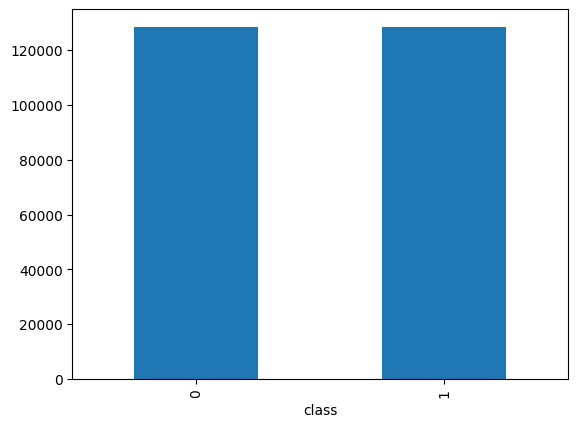

In [13]:
df = pd.read_csv("trainb.csv", delimiter="|")
df.groupby('class').size().plot(kind='bar');

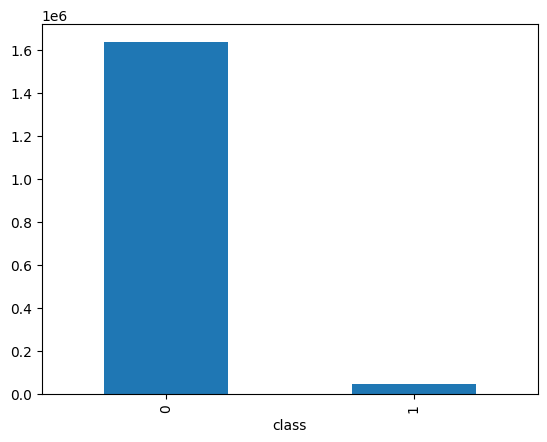

In [14]:
df = pd.read_csv("trainu.csv", delimiter="|")
df.groupby('class').size().plot(kind='bar');